(b)

<u>Histogram

In [1]:
# import relevant modules with pd as an alias for pandas and plt as an alias for matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

# load csv file "TMA_Data.csv" into a dataframe name employee_data
employee_data = pd.read_csv("TMA_Data.csv")

# display data rows
# employee_data.head()

# capture dataframe
df = pd.DataFrame(employee_data, columns = ["Salary"])

# cast "Price" column of the dataframe into a list 
salary_list = list(employee_data["Salary"])

# salary_min and salary_max are the minimum and maximum value respectively of the salary list
salary_min = min(salary_list)
salary_max = max(salary_list)

# print salary_min and salary_max to see its values
print(salary_min)
print(salary_max)

45046
250000


In [2]:
# create bins and labels. Start from 37,500 as the lowest value to maximum value of 250,000.
salary_bins = [37500,50000,62500,75000,87500,100000,112500,125000,137500,150000,162500,175000,187500,200000,212500,225000,237500,250000]
salary_labels = ['37500-49999','50000-62499','62500-74999','75000-87499','87500-99999','100000-112499','112500-124999','125000-137499','137500-149999','150000-162499','162500-174999','175000-187499','187500-199999','200000-212499','212500-224999','225000-237499','237500-250000']
df['salaryrange'] = pd.cut(df.Salary, bins = salary_bins, labels = salary_labels)

# create pivot table
pivot_table = pd.pivot_table(df, index ='salaryrange',values=['Salary'], aggfunc='count')
pivot_table

,Salary
salaryrange,
37500-49999,26
50000-62499,92
62500-74999,79
75000-87499,14
87500-99999,20
100000-112499,9
112500-124999,2
125000-137499,0
137500-149999,3


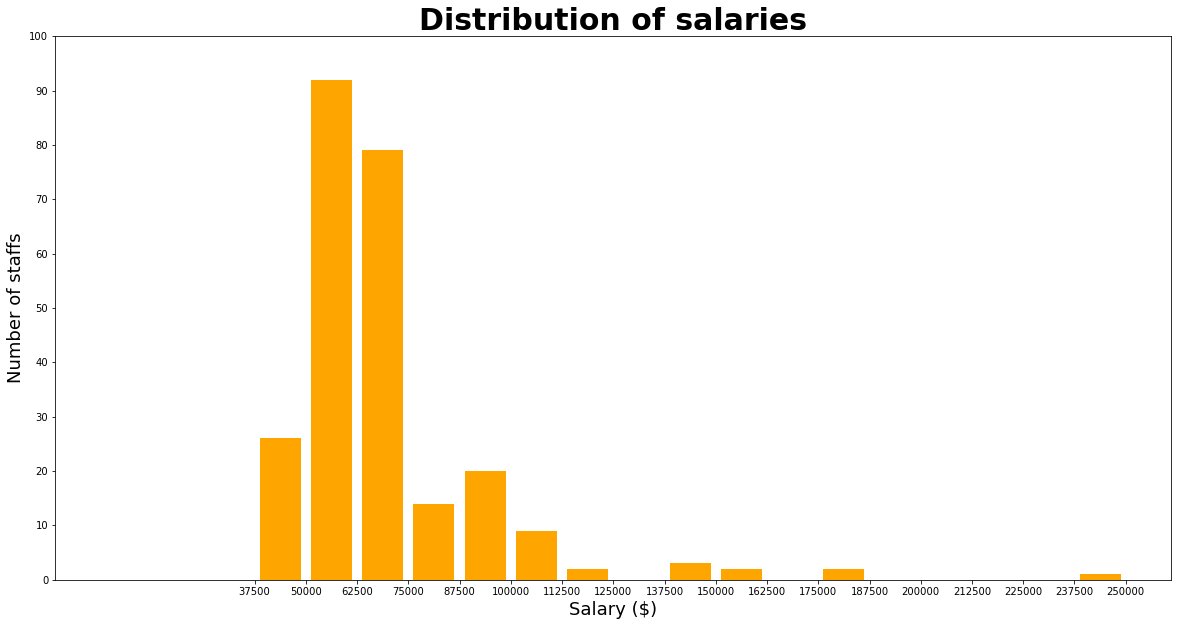

In [3]:
# figure assigns an area for the chart. Figsize represents the figure size in inches.
plt.figure(figsize = (20,10))

# histogram with 20 bins, range from 0 to salary_max, bins are centered between the bin edges, vertical orientation, relative width of 80%
plt.hist(salary_list, bins = 20, range = (0, salary_max), color = "orange", align = "mid", orientation = "vertical", rwidth = 0.8)
plt.title("Distribution of salaries", fontsize = 30, weight = "bold")
plt.xticks(ticks = range(37500, 262500, 12500), labels = range(37500, 262500, 12500))
plt.yticks(ticks = range(0, 110, 10), labels = range(0, 110, 10))
plt.xlabel("Salary ($)", fontsize = 18)
plt.ylabel("Number of staffs", fontsize = 18)

plt.show()

<u>Bar Chart

In [5]:
# import relevant modules with pd as an alias for pandas and plt as an alias for matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

# read csv file "TMA_Data.csv" into a dataframe name employee_data
employee_data = pd.read_csv("TMA_Data.csv")

# capture dataframe
df = pd.DataFrame(employee_data, columns = ["Gender", "Unit"])

# create frequency columns based on gender
df['Frequency'] = df.groupby(["Gender"])["Gender"].transform("count")

# create pivot table. Null values replaced with 0 using fill_value.
df_pivot = df.pivot_table(index = ["Unit"], values = ["Frequency"], columns = ["Gender"], aggfunc = "count", fill_value = 0)
df_pivot

Frequency    
Gender                F  M 
Unit                       
Admin                 4   3
C-Level               1   0
Engineering           5   5
IT                   18  23
Manufacturing       105  64
Sales                11  11

Text(0, 0.5, 'Number of staffs')

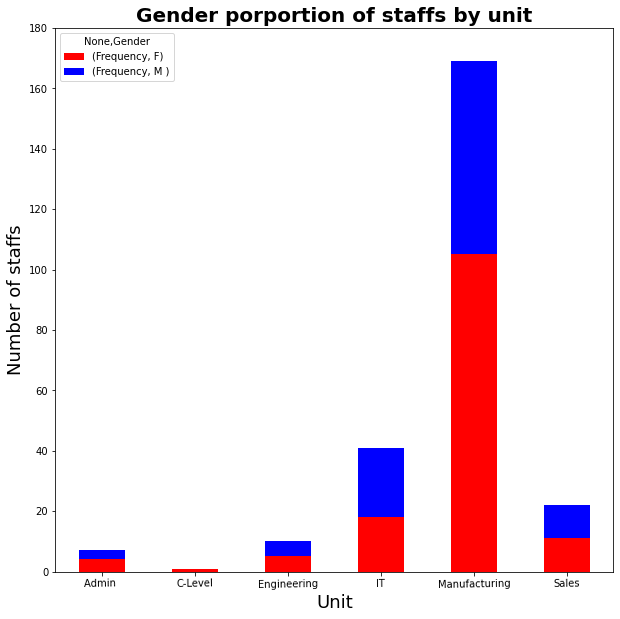

In [6]:
# plot bar chart using the dataframe
bar_chart = df_pivot.plot.bar(stacked = True, color = ["red", "blue"], figsize = (10,10), rot = 1)

plt.title("Gender porportion of staffs by unit", fontsize = 20, weight = "bold")
plt.yticks(ticks = range(0, 190, 20), labels = range(0, 190, 20))
plt.xlabel("Unit", fontsize = 18)
plt.ylabel("Number of staffs", fontsize = 18)

(c)

In [7]:
# import relevant modules with pd as an alias for pandas and np as an alias for numpy
import pandas as pd
import numpy as np

# read csv file "TMA_Data.csv" into a dataframe name employee_data
employee_data = pd.read_csv("TMA_Data.csv")

# capture dataframe
df = pd.DataFrame(employee_data)

#fill missing values NaN under LeftDate column with "1/5/2022"
df["LeftDate"].fillna("5/1/2022", inplace = True)

# format JoinDate date format
df["JoinDate"] = pd.to_datetime(df.JoinDate)

# format LeftDate date format
df["LeftDate"] = pd.to_datetime(df.LeftDate)

# calculate length of service in years
df['LengthOfService'] = df['LeftDate'] - df['JoinDate']
df['LengthOfService'] = df['LengthOfService']/np.timedelta64(1,'Y')
print(df)

      ID             Staff   BirthYear Gender   Marital   Citizenship  \
0      1   Aairah Hastings   10/7/1986      F    Single       Citizen   
1      2  Aaminah Mcmillan    05/25/86      F   Married       Citizen   
2      3      Aamna Howell    04/20/85      F    Single       Citizen   
3      4     Aayan Ferrell   6/10/1984     M    Married       Citizen   
4      5        Ace Potter    9/8/1989      F  Divorced       Citizen   
..   ...               ...         ...    ...       ...           ...   
245  246     Zaina Parrish  10/11/1981      F   Married  Non-Resident   
246  247       Zane Downes    10/24/87     M    Married  Non-Resident   
247  248       Zayd Farley    7/9/1970     M     Single  Non-Resident   
248  249       Zoya Easton    8/2/1980      F    Single  Non-Resident   
249  250    Zuzanna Pruitt    05/21/87      F    Single  Non-Resident   

    Minority   JoinDate   LeftDate           Unit  Salary PerformanceScore  \
0        Yes 2012-04-02 2022-05-01  Manufactu

In [8]:
# calculate minimum length of service
min_srv = df['LengthOfService'].min()
min_years = round(min_srv,1)

# calculate maximum length of service
max_srv = df['LengthOfService'].max()
max_years = round(max_srv,1)

# calculate average length of service
avg_srv = df['LengthOfService'].mean()
avg_years = round(avg_srv,1)

print(f"The minimum, maximum and average length of service of the staffs are {min_years}, {max_years}, {avg_years} years respectively.")

The minimum, maximum and average length of service of the staffs are 0.1, 16.3, 6.8 years respectively.


(d)

In [9]:
# import relevant modules with pd as an alias for pandas
import pandas as pd

# read csv file "TMA_Data.csv" into a dataframe name employee_data
employee_data = pd.read_csv("TMA_Data.csv")

# capture dataframe
df = pd.DataFrame(employee_data, columns = ["Staff"])

In [11]:
# print user input using while loop to allow iterations unless user chooses otherwise
print("--------------------------------------")
print("Welcome to our organization's records.")
 
valid_input = False

while valid_input == False:
    try:
        enquire_input = str(input("Would you like to enquire if a person is a staff of our organization? (Y/N):"))
        if enquire_input == "Y":
            input_name = str(input("Please enter the full name that is registered with our organization:"))
            if input_name in df.values:
                print(f"The name, {input_name}, can be found in our organization's records.") 
            else:
                print(f"The name, {input_name}, cannot be found in our organization's records.") 
        elif enquire_input == "N":
            valid_input = True
            print("The enquiry shall end.")
    except ValueError:
        print("Wrong out")

--------------------------------------
Welcome to our organization's records.
Would you like to enquire if a person is a staff of our organization? (Y/N):Y
Please enter the full name that is registered with our organization:Anish Hoover
The name, Anish Hoover, can be found in our organization's records.
Would you like to enquire if a person is a staff of our organization? (Y/N):Y
Please enter the full name that is registered with our organization:Anish
The name, Anish, cannot be found in our organization's records.
Would you like to enquire if a person is a staff of our organization? (Y/N):
Would you like to enquire if a person is a staff of our organization? (Y/N):
Would you like to enquire if a person is a staff of our organization? (Y/N):
Would you like to enquire if a person is a staff of our organization? (Y/N):Y
Please enter the full name that is registered with our organization:anish hoover
The name, anish hoover, cannot be found in our organization's records.
Would you like to 